In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


In [3]:
df = pd.read_csv("sales_dashboard_data.csv")
df.head()


,Date,Region,Category,Product,Quantity,Price,Total_Sale
0,2023-01-01,East,Accessories,Watch,9,1883.35,16950.15
1,2023-01-02,West,Clothing,Watch,3,8237.28,24711.84
2,2023-01-03,North,Clothing,Watch,3,1489.99,4469.97
3,2023-01-04,East,Clothing,Watch,3,17789.03,53367.09
4,2023-01-05,East,Clothing,Watch,4,1038.53,4154.12


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        100 non-null    object 
 1   Region      100 non-null    object 
 2   Category    100 non-null    object 
 3   Product     100 non-null    object 
 4   Quantity    100 non-null    int64  
 5   Price       100 non-null    float64
 6   Total_Sale  100 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


,Quantity,Price,Total_Sale
count,100.000000,100.000000,100.000000
mean,4.670000,9844.600100,47466.616200
std,2.663085,5878.916339,42192.963613
min,1.000000,798.440000,798.440000
25%,2.750000,4470.365000,13968.822500
50%,4.000000,9271.270000,33350.850000
75%,7.000000,14509.892500,76257.032500
max,9.000000,19645.900000,173901.690000


C:\Users\utkar\AppData\Local\Temp\ipykernel_3464\1009072329.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='Region', y='Total_Sale', palette='Set2')


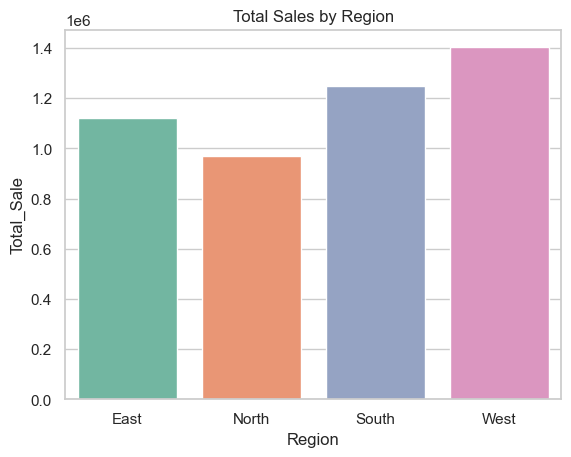

In [7]:
region_sales = df.groupby('Region')['Total_Sale'].sum().reset_index()

sns.barplot(data=region_sales, x='Region', y='Total_Sale', palette='Set2')
plt.title('Total Sales by Region')
plt.show()

C:\Users\utkar\AppData\Local\Temp\ipykernel_3464\970951970.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Category', y='Total_Sale', palette='muted')


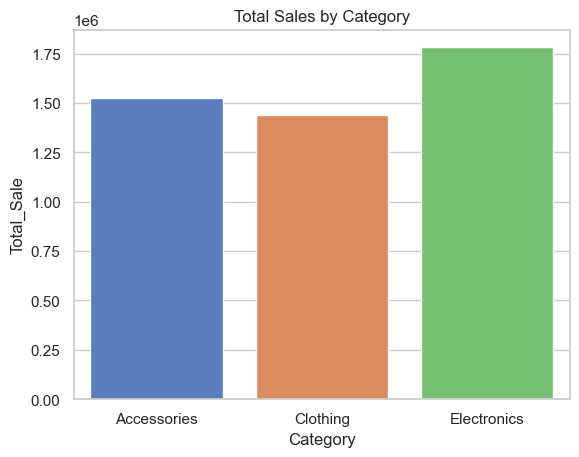

In [9]:
category_sales = df.groupby('Category')['Total_Sale'].sum().reset_index()

sns.barplot(data=category_sales, x='Category', y='Total_Sale', palette='muted')
plt.title('Total Sales by Category')
plt.show()


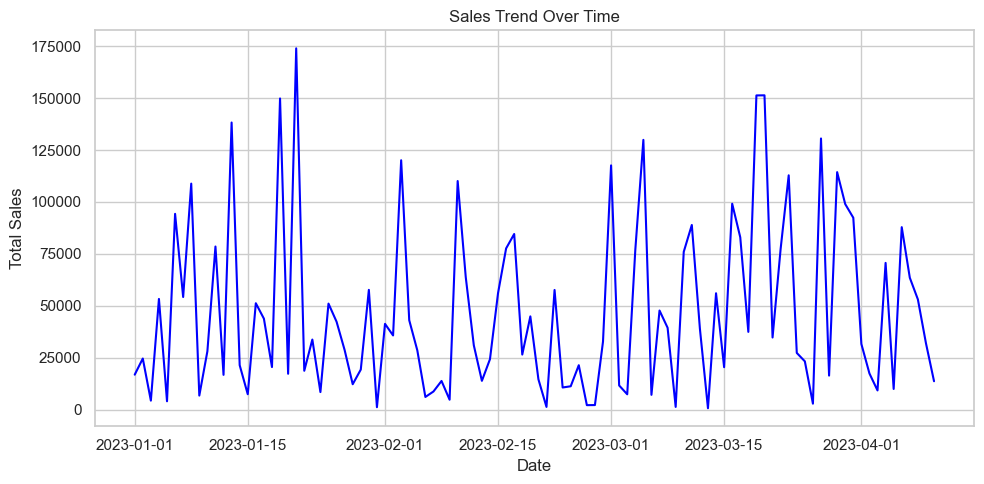

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby('Date')['Total_Sale'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(daily_sales['Date'], daily_sales['Total_Sale'], color='blue')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\utkar\AppData\Local\Temp\ipykernel_3464\293143810.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Total_Sale', y='Product', palette='coolwarm')


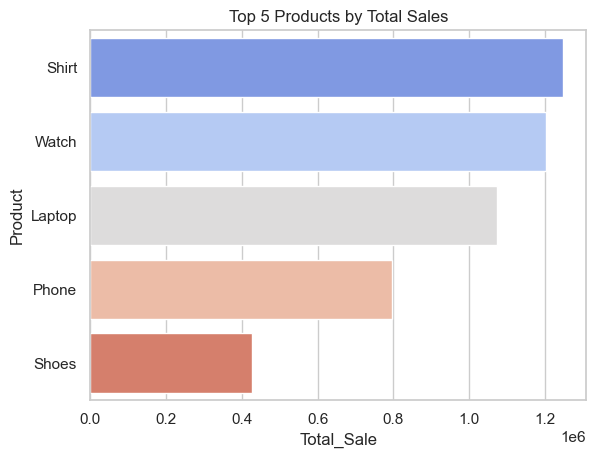

In [13]:
top_products = df.groupby('Product')['Total_Sale'].sum().sort_values(ascending=False).head(5).reset_index()

sns.barplot(data=top_products, x='Total_Sale', y='Product', palette='coolwarm')
plt.title('Top 5 Products by Total Sales')
plt.show()
